In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

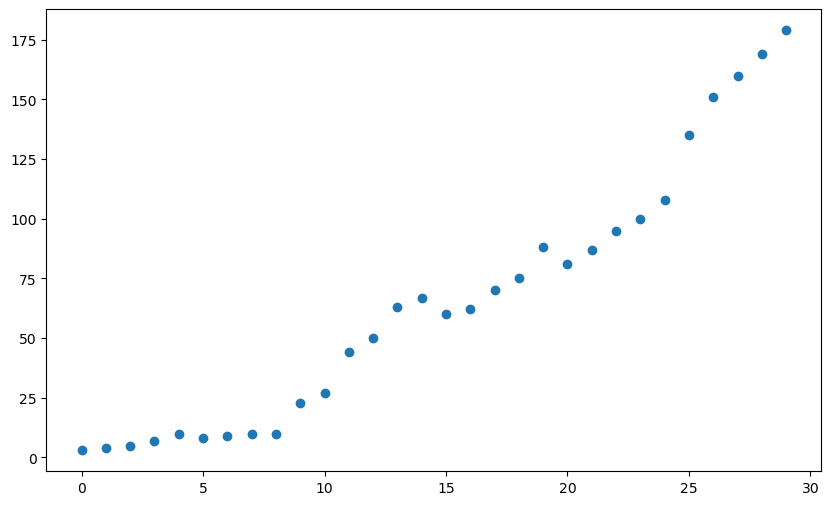

In [2]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

Asumamos que puede ser ajustado por algo de segundo grado pero en general existen métodos para determinar cual es el mejor ajusted polinomial

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Se crea una instancia de grado 2 y sin ordenada al origen
poly = PolynomialFeatures(degree=2, include_bias=False)


Sel bias no se establece en False, los datos se alteran para que no exista ordenada al origen. Por nuestra parte haremos una RegressionLinear primero para encargarnos de dicho bias

In [4]:
# Se ajusta y transforma la instancia con los datos

poly_features = poly.fit_transform(x.reshape(-1, 1))
# Siempre espera vectores de dos dimensiones por lo que se convierte a un array bidimensional

In [8]:
x.reshape(-1, 1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29]])

In [9]:
poly_features # Eleva al cuadrado cada termino

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 25., 625.],
       [ 26., 676.],
       [ 27., 729.],
       [ 28., 784.],
       [ 29., 841.]])

In [11]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y) # Necesita imputs x, x2,..., y el output y
poly_reg_model #Modelo entrenado

LinearRegression()

In [12]:
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([  1.70806452,   3.04187987,   4.70292388,   6.69119657,
         9.00669792,  11.64942794,  14.61938662,  17.91657397,
        21.54098999,  25.49263467,  29.77150802,  34.37761004,
        39.31094073,  44.57150008,  50.1592881 ,  56.07430478,
        62.31655014,  68.88602415,  75.78272684,  83.00665819,
        90.55781821,  98.4362069 , 106.64182425, 115.17467027,
       124.03474495, 133.22204831, 142.73658033, 152.57834101,
       162.74733037, 173.24354839])

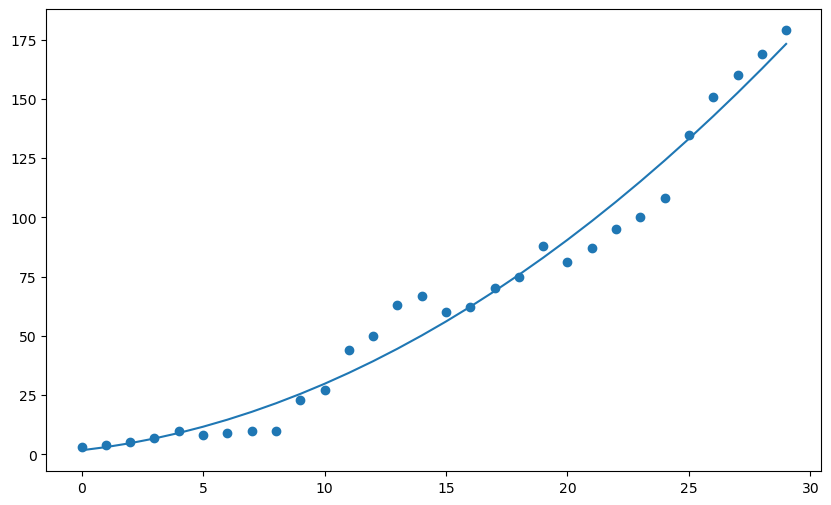

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.show()

In [15]:
# Multiples variables

np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20 # Solo depende de x_1

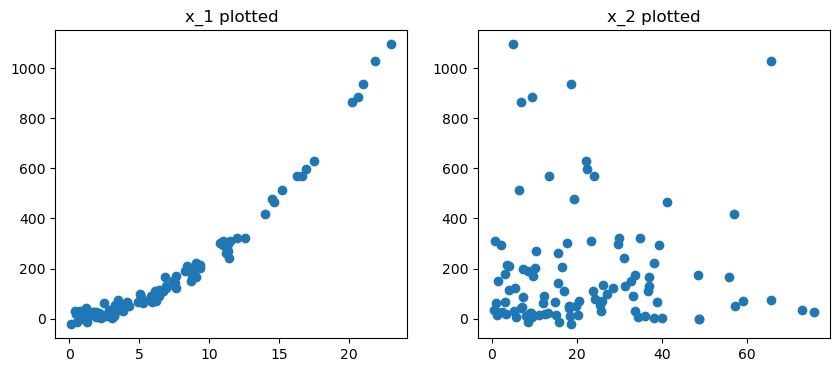

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [17]:
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269
...,...,...,...
95,0.773401,48.823150,-0.430738
96,3.438537,18.069578,44.308720
97,0.435969,12.608466,19.383456
98,6.200008,24.328550,78.371729


In [18]:
from sklearn.model_selection import train_test_split

X, y = df[["x_1", "x_2"]], df["y"] # Dividir inputs de target
poly = PolynomialFeatures(degree=2, include_bias=False) # Obtener los otros grados
poly_features = poly.fit_transform(X) # Obtener segundo grado de ambas features

# Entrenar el 70 de los datos
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
# Para siempre dividir igual es el random_state




In [20]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train) # Se calcula regresión con valores de entrenamiento

poly_reg_y_predicted = poly_reg_model.predict(X_test) # Se obtienen predictores del input test

from sklearn.metrics import mean_squared_error

poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse # Se muestra el root mean square error

20.93770783907854

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test) # Se hace solo sobre X y no sobres sus potencias
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

62.30248745387854

In [21]:
X

,x_1,x_2
0,16.243454,13.413857
1,6.117564,36.735231
2,5.281718,12.104749
3,10.729686,17.807356
4,8.654076,32.847355
...,...,...
95,0.773401,48.823150
96,3.438537,18.069578
97,0.435969,12.608466
98,6.200008,24.328550


In [23]:
poly_features

""" Nota que incluye """
#x1, x2, x1**2, x1*x2 y x2**2

array([[1.62434536e+01, 1.34138569e+01, 2.63849786e+02, 2.17887363e+02,
        1.79931558e+02],
       [6.11756414e+00, 3.67352311e+01, 3.74245910e+01, 2.24730133e+02,
        1.34947721e+03],
       [5.28171752e+00, 1.21047493e+01, 2.78965400e+01, 6.39338662e+01,
        1.46524954e+02],
       [1.07296862e+01, 1.78073557e+01, 1.15126166e+02, 1.91067339e+02,
        3.17101917e+02],
       [8.65407629e+00, 3.28473554e+01, 7.48930365e+01, 2.84263519e+02,
        1.07894875e+03],
       [2.30153870e+01, 5.08147299e+00, 5.29708037e+02, 1.16952067e+02,
        2.58213678e+01],
       [1.74481176e+01, 2.22166935e+01, 3.04436809e+02, 3.87639482e+02,
        4.93581472e+02],
       [7.61206901e+00, 2.86110181e+01, 5.79435946e+01, 2.17789044e+02,
        8.18590354e+02],
       [3.19039096e+00, 7.98655518e+00, 1.01785945e+01, 2.54802335e+01,
        6.37850636e+01],
       [2.49370375e+00, 9.78436401e-01, 6.21855842e+00, 2.43993053e+00,
        9.57337790e-01],
       [1.46210794e+01, 4.1193

In [24]:
lin_reg_model.coef_

# Y = B1*x1 + B2*x2

array([43.73176255, -0.53140809])

In [25]:
poly_reg_model.coef_

array([ 3.61945509, -1.0859955 ,  1.89905813,  0.0207338 ,  0.01300394])